## Matías Zúñiga

# P6

Usando `camb`, se quiere graficar la evolución de los parámetros de densidad para materia, radiación, energía oscura y curvatura. 

In [1]:
# se importan librerías
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad

In [2]:
# constantes cosmológicas a ocupar
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054

# se crean parámetros
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

#se generan soluciones dado este set de parámetros
results = camb.get_results(pars)

#array de redshift
z = np.linspace(0, 5, 1000)

# se obtienen los parámetros de densidad con lon la función get_Omega dentro de la clase results de CAMB
omegaMatter = results.get_Omega('cdm', z) + results.get_Omega('baryon', z) + results.get_Omega('nu', z) #nu = neutrinos masivos -> no relativistas
omegaRadiation = results.get_Omega('photon', z) + results.get_Omega('neutrino', z)
omegaDE = results.get_Omega('de', z)
omegaCurvature = results.get_Omega('K', z)

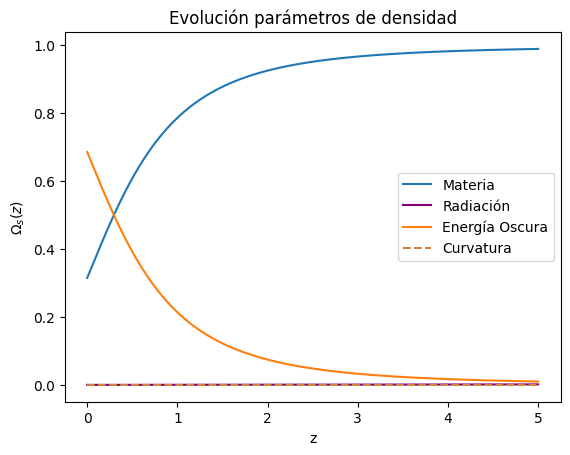

In [3]:
# ahora se hacen los plots
plt.plot(z, omegaMatter, label = 'Materia')
plt.plot(z, omegaRadiation, label = 'Radiación', color = 'purple')
plt.plot(z, omegaDE, label = 'Energía Oscura')
plt.plot(z, omegaCurvature, label = 'Curvatura', color = 'peru', linestyle = 'dashed') # estilo de línea para que se note más
plt.xlabel('z')
plt.ylabel(r'$\Omega_s(z)$')
plt.title('Evolución parámetros de densidad')
plt.legend()

In [4]:
# constantes cosmológicas a ocupar
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054

# se crean parámetros
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

#se generan soluciones dado este set de parámetros
results = camb.get_results(pars)

#array de redshift
z = np.linspace(0, 10, 1000)

# se obtienen los parámetros de densidad con lon la función get_Omega dentro de la clase results de CAMB
omegaMatter = results.get_Omega('cdm', z) + results.get_Omega('baryon', z) + results.get_Omega('nu', z) #nu = neutrinos masivos -> no relativistas
omegaRadiation = results.get_Omega('photon', z) + results.get_Omega('neutrino', z)
omegaDE = results.get_Omega('de', z)
omegaCurvature = results.get_Omega('K', z)

# P7

La relación de dualidad de distancia:

$$
D_L(z) = (1+z)²D_A (z) 
$$

donde $D_L(z)$ es la distancia de luminosidad y $D_A(Z)$ la distancia angular, ambas en función del redshift $z$. Usando `Python`, se quiere graficar las líneas de constante $f_K(\chi)$ en el plano $\Omega_{m,0} - \Omega_{\Lambda,0}$. donde:

$$
\begin{align*}
    f_K(\chi) =
    \begin{dcases}
        \frac{c}{H_0\sqrt{\Omega_{K,0}}} \sinh{\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}>0 \\
        \frac{c}{H_0}\int_0^z \frac{dx}{E(x)} & \Omega_{k,0}=0\\
        \frac{c}{H_0\sqrt{-\Omega_{K,0}}} \sin{\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right)} & \Omega_{k,0}<0\\
    \end{dcases}
\end{align*}
$$




In [34]:
# se definen los arreglos de cada cosa
O_m = np.linspace(0.1, 2, 100)
O_lambda = np.linspace(0.1, 2, 100)
O_r = omegaRadiation[0] # parametro de densidad de radiación obtenido en P6

# vel luz en km/s
c = 3*10**5

# se define el parámetro de Hubble
def H(z, omegaM, omegaLambda, omegaK):
    return H0 * np.sqrt(omegaM*((1+z)**4) + omegaLambda+ omegaK*((1+z)**2) + O_r*((1+z)**3))

def f(z, omegaM, omegaLambda):
    # como todo suma 1, se define el párametro para la curvatura como:
    omegaK = 1 - omegaM - omegaLambda - O_r
    # función para el integrando
    def g(z, omegaM, omegaLambda, omegaK):
        return H0/(H(z,omegaM, omegaLambda, omegaK))
    int, e = quad(g, 0, z, args=(omegaM, omegaLambda, omegaK))
    if omegaK > 0:
        return (c/(H0*np.sqrt(omegaK))) * (np.sinh(np.sqrt(omegaK) * int))
    elif omegaK < 0:
        return (c/(H0*np.sqrt(-omegaK))) * (np.sin(np.sqrt(-omegaK) * int))
    else:
        return (c/H0) * int
    

In [42]:
# se generan soluciones para distintos valores de redshift
### función para generar soluciones
def Fsol(z):
    F = np.zeros((len(O_m), len(O_m)))
    for i in range(len(O_m)):
        for j in range(len(O_m)):
            F[i, j] = f(z, O_m[i], O_lambda[j]) 
    return F

F1 = Fsol(0.5)
F2 = Fsol(1)
F3 = Fsol(5)
F4 = Fsol(10)


C:\Users\Matiz\AppData\Local\Temp\ipykernel_14588\3476737332.py:11: RuntimeWarning: invalid value encountered in sqrt
  return H0 * np.sqrt(omegaM*((1+z)**4) + omegaLambda+ omegaK*((1+z)**2) + O_r*((1+z)**3))
C:\Users\Matiz\AppData\Local\Temp\ipykernel_14588\3476737332.py:19: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  int, e = quad(g, 0, z, args=(omegaM, omegaLambda, omegaK))


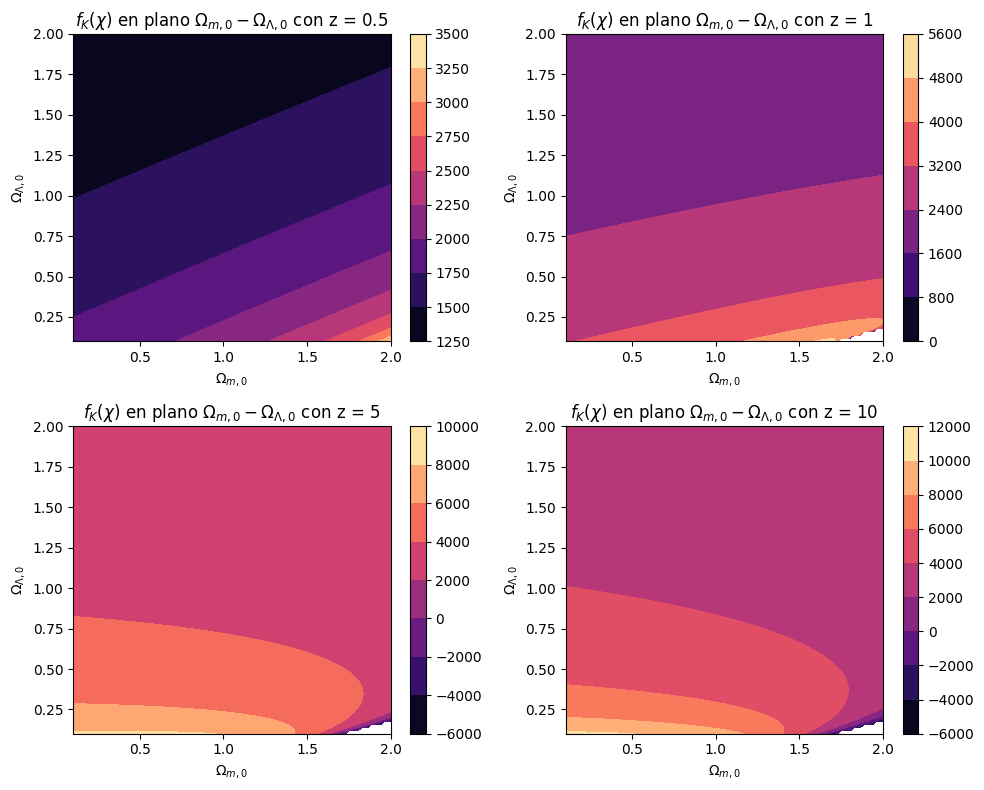

In [43]:
# se plotea para distintos redshift
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

contour1 = axs[0, 0].contourf(O_m, O_lambda, F1, cmap='magma')
axs[0, 0].set_title(r'$f_K(\chi)$ en plano $\Omega_{m,0}-\Omega_{\Lambda,0}$ con z = 0.5')
axs[0, 0].set_xlabel(r'$\Omega_{m,0}$')
axs[0, 0].set_ylabel(r'$\Omega_{\Lambda,0}$')
fig.colorbar(contour1, ax=axs[0, 0])

contour2 = axs[0, 1].contourf(O_m, O_lambda, F2, cmap='magma')
axs[0, 1].set_title(r'$f_K(\chi)$ en plano $\Omega_{m,0}-\Omega_{\Lambda,0}$ con z = 1')
axs[0, 1].set_xlabel(r'$\Omega_{m,0}$')
axs[0, 1].set_ylabel(r'$\Omega_{\Lambda,0}$')
fig.colorbar(contour2, ax=axs[0, 1])

contour3 = axs[1, 0].contourf(O_m, O_lambda, F3, cmap='magma')
axs[1, 0].set_title(r'$f_K(\chi)$ en plano $\Omega_{m,0}-\Omega_{\Lambda,0}$ con z = 5')
axs[1, 0].set_xlabel(r'$\Omega_{m,0}$')
axs[1, 0].set_ylabel(r'$\Omega_{\Lambda,0}$')
fig.colorbar(contour3, ax=axs[1, 0])

contour4 = axs[1, 1].contourf(O_m, O_lambda, F4, cmap='magma')
axs[1, 1].set_title(r'$f_K(\chi)$ en plano $\Omega_{m,0}-\Omega_{\Lambda,0}$ con z = 10')
axs[1, 1].set_xlabel(r'$\Omega_{m,0}$')
axs[1, 1].set_ylabel(r'$\Omega_{\Lambda,0}$')
fig.colorbar(contour4, ax=axs[1, 1])

plt.tight_layout()

plt.show()